# <p style = "text-align: center"> **Image Classification of Parasitized and Uninfected Cells** </p>

This project focuses on developing a machine learning model to classify images of parasitized and uninfected cells. Using TensorFlow and Keras, I built a convolutional neural network (CNN) with data augmentation techniques to enhance the model's performance. The model achieved an accuracy of approximately 94%, demonstrating its effectiveness in distinguishing between the two types of cells. This project marks an exciting step in my data science journey, and I am eager to continue learning and improving my skills in this field.

## Example Images of Cells:
---

<center>
  
| **Parasitized Cell** | **Uninfected Cell** |
|:--------------------:|:-------------------:|
|<img src="Sample_From_Dataset\Parasitized\C33P1thinF_IMG_20150619_121102a_cell_193.png" width="300">|<img src="Sample_From_Dataset\Uninfected\C1_thinF_IMG_20150604_104722_cell_15.png" width="300">|
|<img src="Sample_From_Dataset\Parasitized\C37BP2_thinF_IMG_20150620_131423a_cell_92.png" width="300">|<img src="Sample_From_Dataset\Uninfected\C1_thinF_IMG_20150604_104919_cell_31.png" width="300">|

</center>



## Importing the necessary libraries

We will need:

- *TensorFlow and Keras*: Frameworks for building and training neural networks.

- *Conv2D, MaxPooling2D, Dense, Flatten, Dropout*: Layers commonly used in CNNs for feature detection, down-sampling, and preventing overfitting.

- *EarlyStopping*: Callback to stop training when performance stops improving.
regularizers: Techniques to prevent overfitting.

- *Matplotlib (plt)*: For plotting and visualizing data.

- *OpenCV (cv)*: For image processing tasks.

- *NumPy (np)*: For numerical operations and array handling.

These tools are essential for constructing and optimizing the CNN model in this project.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import os
import imghdr
import warnings

# For disabling warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR) 

## This can prevent crashes related to duplicate libraries on certain systems
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE' 


In [2]:

data_dir = 'cell_images'

os.listdir(data_dir)

['Parasitized', 'Uninfected']

## Image File Handling and Cleanup

In this code snippet, we are performing image file handling and cleanup within a given directory containing images categorized by classes. The purpose of this script is to ensure that only valid image files with specific extensions (e.g., png, jpg, jpeg) are retained within each class directory while removing any invalid or corrupt image files.

Here's what the code does:
- `image_exts = ["png", "jpg", "jpeg"]`: Defines a list of valid image file extensions.
- Outer Loop: Iterates over each class directory within the main data directory (`data_dir`).
- Inner Loop: Iterates over each image file within the class directory.
- `image_path = os.path.join(data_dir, image_class, image)`: Constructs the full path of the current image file.
- `img = cv.imread(image_path)`: Reads the image using OpenCV.
- `img_type = imghdr.what(image_path)`: Determines the type of the image file.
- If the image type is not in the list of valid extensions (`image_exts`), the image file is removed from the directory using `os.remove(image_path)`.
- Any exceptions that occur during this process are caught and printed to the console.

This script is essential for data preprocessing tasks, especially when dealing with large datasets containing diverse file types. It helps ensure data integrity by removing any corrupted or invalid image files, thereby improving the quality and reliability of the dataset for subsequent analysis or model training.


In [3]:

image_exts = ["png", "jpg", "jpeg"]

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)): #will loop through each image in the directory (data_dir/image_class) i.e (cell_images/Parasitized) then (cell_images/Uninfected)
        image_path = os.path.join(data_dir, image_class, image) #will get the path of the image
        try:
            img = cv.imread(image_path) #will read the image
            img_type = imghdr.what(image_path) #will get the type of the image

            if img_type not in image_exts: #if the image type is not in the list of image_exts
                os.remove(image_path) #remove the image
                print(f"Removed {image_path}")

        except Exception as e:
            print(f"Issue with file: {image_path}")


## Reading a sample image from the dataset

(163, 142, 3)


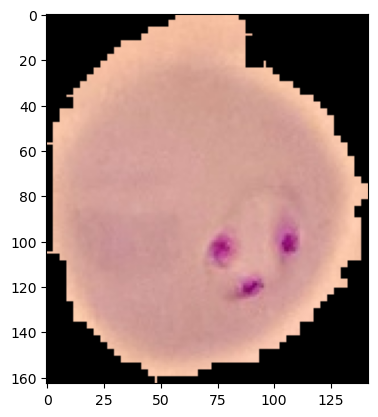

In [4]:
img = cv.imread(os.path.join(data_dir, 'Parasitized', 'C33P1thinF_IMG_20150619_114756a_cell_179.png'))
print(img.shape)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) #matplotlib uses RGB but cv2 uses BGR

plt.show()

## Loading and Preprocessing Image Dataset

In this code snippet, we utilize two key TensorFlow functions to streamline the process of loading and preprocessing an image dataset:

- `tf.keras.utils.image_dataset_from_directory('cell_images')`: This function simplifies the process of creating a `tf.data.Dataset` object directly from a directory structure containing image data. It automatically labels the images based on the subfolder names and applies basic preprocessing such as resizing and scaling. By providing the directory path as an argument, this function abstracts away the manual loading and labeling of image data, saving time and effort in data preprocessing.

- `dataset.as_numpy_iterator()`: Once the dataset has been created, we convert it into an iterator using the `as_numpy_iterator()` method. This iterator allows us to efficiently iterate over the dataset in batches and extract the data as NumPy arrays. By converting the dataset into an iterator of NumPy arrays, we can seamlessly integrate it into TensorFlow's data pipeline for model training and evaluation.

These functions play a crucial role in simplifying the data loading and preprocessing steps, making it easier to prepare image datasets for training machine learning models. By abstracting away the complexities of data loading and transformation, TensorFlow empowers developers to focus on building and training models more effectively.


In [5]:
# Load dataset
# This will only target in the folder, in our case, 2 subfolder and label them respectively
dataset = tf.keras.utils.image_dataset_from_directory('cell_images')

dataset_itrt =  dataset.as_numpy_iterator() # Converting to numpy iterator


Found 27556 files belonging to 2 classes.


## Extracting Batches from NumPy Iterator

In the provided code snippet, `dataset_itrt.next()` is used to extract a batch of data from a NumPy iterator `dataset_itrt`:

- `dataset_itrt.next()`: This function call retrieves the next batch of data from the NumPy iterator `dataset_itrt`. Each batch typically contains a subset of samples from the original dataset. By calling `next()` on the iterator, we sequentially retrieve batches of data, which can then be used for various purposes such as model training, evaluation, or inference.

The `next()` function is commonly used to iterate over sequences in Python, and in this context, it allows us to efficiently process large datasets in smaller, manageable batches. This batching approach is essential for training deep learning models, as it enables efficient memory usage, faster computation, and improved generalization by exposing the model to diverse subsets of data during training.

Overall, the `next()` function facilitates the extraction of batches from a NumPy iterator, which is a fundamental operation in the training and evaluation of machine learning models, particularly deep neural networks.


In [6]:
batch = dataset_itrt.next()

## Visualizing Batch Data and Class Labels

In the provided code snippet, batch data and their corresponding class labels are visualized using matplotlib:


- The `enumerate()` function provides both the index `idx` and the image `img` from the batch.

- The `imshow()` function is used to render the image, and `astype(int)` is applied to ensure that the image is displayed as integers.


By visualizing the batch data and their class labels, this code snippet provides insight into the contents of the dataset and helps verify the correctness of the data preprocessing and labeling processes.


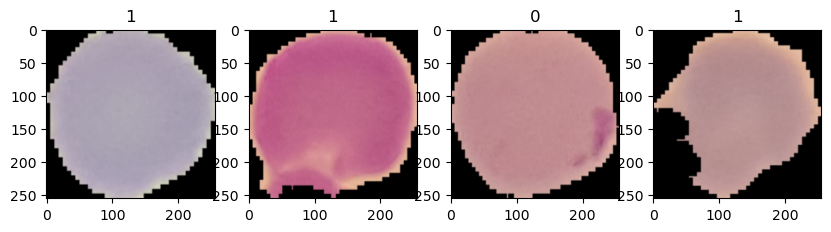

In [7]:
# This will tell us which class, 0 or 1, is for Parasitized or Uninfected
fig, ax = plt.subplots(ncols=4, figsize=(10,10)) # Initializing a matplotlib figure with 4 subplots

# Labels will be the index, Images the key
for idx, img in enumerate(batch[0][:4]): # loop iterates over the first 4 images in the batch data and corresponding labels

    ax[idx].imshow(img.astype(int)) # Rendering the image
    ax[idx].title.set_text(batch[1][idx]) # setting the title of the subplot to the corresponding class label
    
# We get to see 0 is for Parasitized, 1 is for  Uninfected

## Scaling the Dataset

In the code below, the dataset is scaled to ensure that the pixel values of the images fall within the range [0, 1]:


Scaling the dataset is a common preprocessing step in machine learning tasks, especially when dealing with image data. By scaling the pixel values to a common range, it helps improve the convergence of optimization algorithms and ensures that the model is less sensitive to differences in the input data.


In [8]:
# Scaling the dataset
scaled_dataset = dataset.map(lambda x, y: (x/255, y))# apply a scaling operation to each image in the dataset

## Converting to NumPy Iterator after Scaling

Converting the dataset to a NumPy iterator enables easy iteration over the scaled dataset for further processing or model training. NumPy iterators are convenient when working with TensorFlow datasets, as they provide efficient access to the data in NumPy array format, which is compatible with many TensorFlow operations and models.

The NumPy iterator allows iterating over the dataset in NumPy-compatible format.

In [9]:
# Creating a NumPy iterator, scaled_itrt, from the scaled dataset 
scaled_itrt = scaled_dataset.as_numpy_iterator()

In [10]:
# We repeat what we did before by extracting atches from the scaled dataset numpy iterator
batch = scaled_itrt.next()

## Displaying Scaled Images from the Dataset

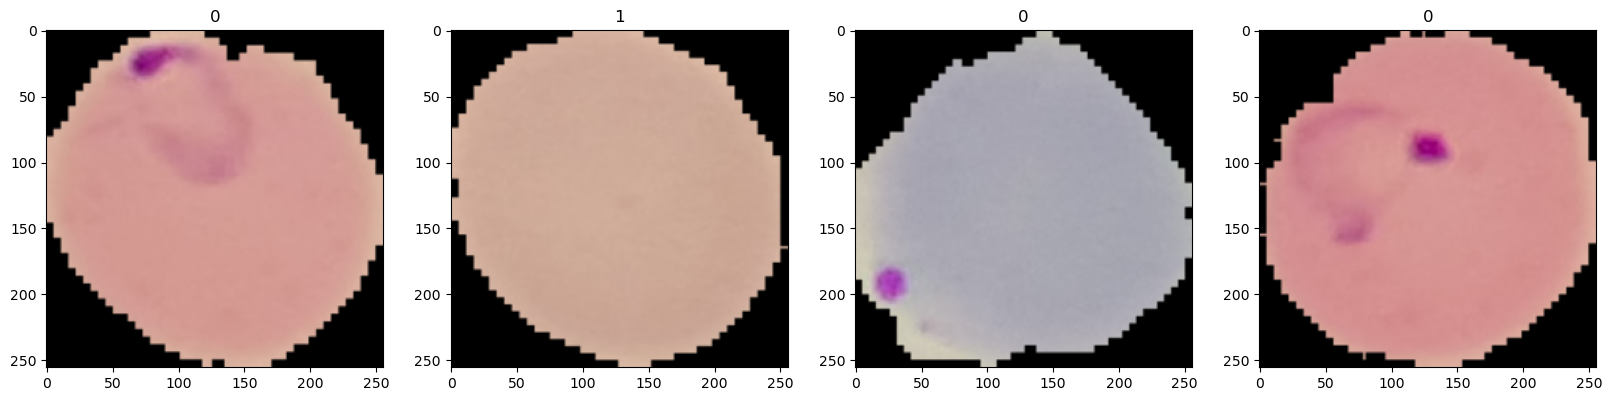

In [11]:

fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    

## Splitting Dataset into Train, Validation, and Test Sets

In [12]:
# Split dataset into train, validation, and test sets
batch_number = len(scaled_dataset)
print(batch_number)


862



Splitting the dataset into separate subsets for training, validation, and testing is a crucial step in machine learning model development. Here's why it's important:

1. **Training Set**: The model learns from the patterns and relationships present in the training data. This set constitutes the majority of the dataset and is used to optimize the model's parameters during training.

2. **Validation Set**: After each training epoch or iteration, the model's performance is evaluated on the validation set. This allows monitoring for overfitting and helps determine the optimal hyperparameters of the model.

3. **Test Set**: The test set serves as a completely independent subset of the dataset, not used during training or hyperparameter tuning. It provides an unbiased estimate of the model's performance on unseen data and helps assess its generalization ability.

By splitting the dataset into these subsets, we can train, validate, and test the model effectively, ensuring robust performance on new, unseen data.


In [13]:

train_size = int((0.7 * batch_number))

val_size = int((0.2 * batch_number))

test_size = int((0.1 * batch_number))


In [14]:
print('train_size: ', train_size)
print('val_size: ', val_size)
print('test_size: ', test_size)

train_size:  603
val_size:  172
test_size:  86


## Creating Train, Validation, and Test Datasets

After scaling the dataset, we split it into three subsets: train, validation, and test datasets. Here's how the splitting process works:

1. **Train Dataset**: We take the first `train_size` samples from the scaled dataset. This subset is used to train the model, allowing it to learn from the patterns and relationships present in the data.

2. **Validation Dataset**: The next `val_size` samples from the scaled dataset are skipped to avoid overlap with the train dataset, and then the subsequent `val_size` samples are taken. This subset is used to evaluate the model's performance during training and tune hyperparameters, helping prevent overfitting.

3. **Test Dataset**: Finally, we skip the samples used for the train and validation datasets, and take the next `test_size` samples. This subset remains completely independent and is used to assess the model's performance on unseen data, providing an unbiased estimate of its generalization ability.


In [15]:

train_dataset = scaled_dataset.take(train_size)
val_dataset = scaled_dataset.skip(train_size).take(val_size)
test_dataset = scaled_dataset.skip(train_size + val_size).take(test_size)


## Creating a _Convolutional Neural Network_ (CNN) Model

We are creating a convolutional neural network (CNN) model with data augmentation. The *data augmentation* helps in generating additional training data by applying random transformations like *flipping*, *rotation*, and *zooming* to the input images. This process increases the diversity of the training dataset and helps the model generalize better to unseen data. 
<center>
<img src="Basic-architecture-of-CNN.png">
</center>
The CNN architecture consists of **convolutional layers** followed by **max-pooling layers** for feature extraction, a _flattening layer_ to convert the 2D feature maps into a 1D vector, and **dense layers** for classification. The final dense layer uses the sigmoid activation function to output a probability indicating the likelihood of the input image belonging to a specific class.


In [16]:

# Data augmentation, given the nature of medical imaging
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

# Build model
model = Sequential([
    data_augmentation,
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5), 
    Dense(1, activation='sigmoid')
])



## Compiling the Model
We compile the model using the **Adam optimizer**, which is an adaptive learning rate optimization algorithm that's well-suited for training neural networks. For the loss function, we use *binary cross-entropy*, which is commonly used for binary classification tasks. Additionally, we specify *accuracy* as the metric to monitor during training, which gives us insight into how well the model is performing in terms of correctly classifying the images.


In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Model Summary

The `summary` method provides a textual summary of the model's architecture, including the layer names, output shapes, and number of parameters. It gives an overview of the model's structure and can be helpful for understanding the model's complexity and debugging potential issues.


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)       

We create a `TensorBoard` callback object named `tensorboard_callback`, which is used to visualize various aspects of the model's training process using TensorBoard. TensorBoard is a visualization toolkit included with TensorFlow that helps in monitoring and analyzing the performance of machine learning models. By specifying the `log_dir` parameter, we define the directory where the logs generated by TensorBoard will be stored. These logs contain information such as training loss, accuracy, and other metrics over time, as well as visualizations of the model's architecture and training progress.

#### Note
A `TensorBoard` is a visualization toolkit included with TensorFlow, crucial for monitoring and analyzing the performance of machine learning models through visualizations and metrics tracking.

In [18]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

## Training the Model

We are training the model using the `fit` method, which takes the training dataset as input. We specify the number of epochs, which represents the number of times the entire training dataset is passed forward and backward through the neural network. Additionally, we provide the validation dataset for evaluating the model's performance during training. The `callbacks` parameter allows us to specify additional actions to be taken during training, such as logging training metrics using TensorBoard.


In [19]:
# Train model
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=[tensorboard_callback])

Epoch 1/10
603/603 [==============================] - 329s 534ms/step - loss: 0.5403 - accuracy: 0.8005 - val_loss: 0.2615 - val_accuracy: 0.9271
Epoch 2/10
603/603 [==============================] - 324s 537ms/step - loss: 0.3153 - accuracy: 0.9186 - val_loss: 0.2353 - val_accuracy: 0.9382
Epoch 3/10
603/603 [==============================] - 323s 535ms/step - loss: 0.2989 - accuracy: 0.9249 - val_loss: 0.2399 - val_accuracy: 0.9382
Epoch 4/10
603/603 [==============================] - 320s 530ms/step - loss: 0.2972 - accuracy: 0.9259 - val_loss: 0.2477 - val_accuracy: 0.9320
Epoch 5/10
603/603 [==============================] - 323s 536ms/step - loss: 0.2948 - accuracy: 0.9271 - val_loss: 0.2375 - val_accuracy: 0.9339
Epoch 6/10
603/603 [==============================] - 320s 530ms/step - loss: 0.2921 - accuracy: 0.9258 - val_loss: 0.2392 - val_accuracy: 0.9371
Epoch 7/10
603/603 [==============================] - 321s 533ms/step - loss: 0.2935 - accuracy: 0.9244 - val_loss: 0.2301 -

## Visualizing Training Statistics

We use Matplotlib to create subplots for visualizing training statistics such as loss and accuracy over epochs. The upper subplot displays the training and validation loss over epochs, while the lower subplot shows the training and validation accuracy. These visualizations provide insights into the model's performance and training progress.


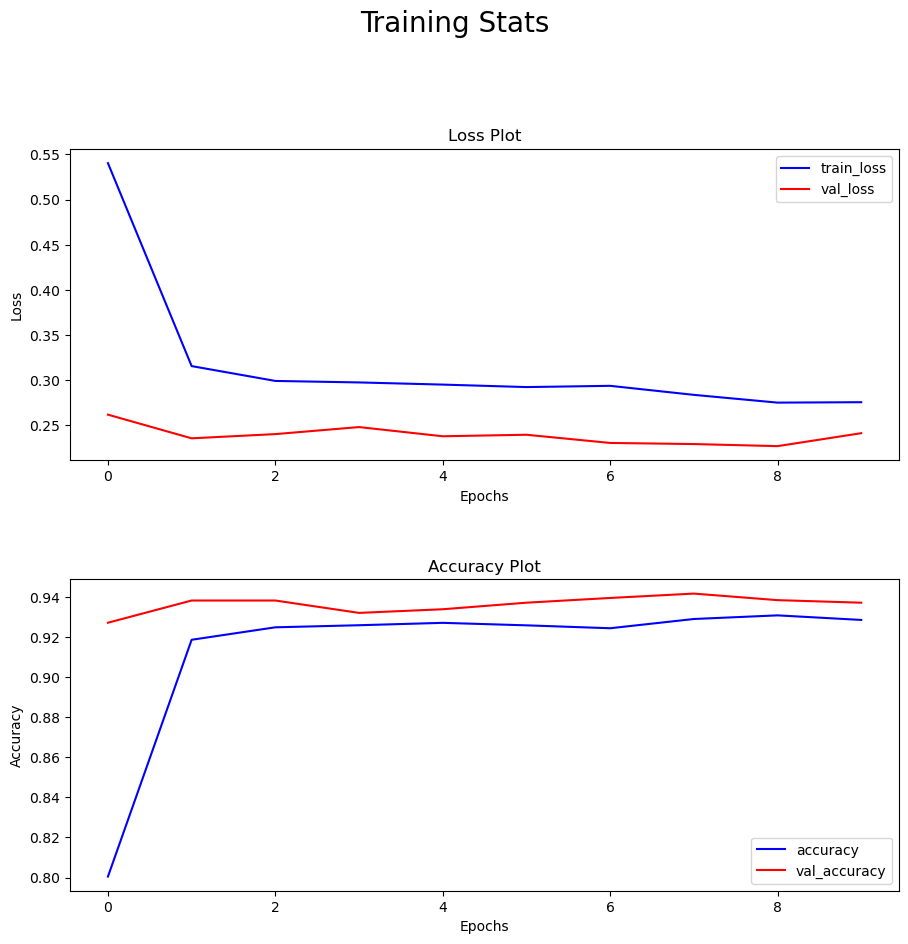

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(history.history['loss'], color='blue', label="train_loss")
ax[0].plot(history.history['val_loss'], color='red', label="val_loss")
ax[0].set(
    title = "Loss Plot",
    xlabel ="Epochs",
    ylabel = "Loss"
)
ax[0].legend(loc = "upper right")

ax[1].plot(history.history['accuracy'], color='blue', label="accuracy")
ax[1].plot(history.history['val_accuracy'], color='red', label="val_accuracy")
ax[1].set(
    title = "Accuracy Plot",
    xlabel ="Epochs",
    ylabel = "Accuracy"    
)
ax[1].legend(loc = "lower right")
fig.suptitle('Training Stats', fontsize = 20)
fig.tight_layout(pad=4)

plt.show()

## Saving the Trained Model

We use the `save` method to save the trained model in two formats: `.keras` and `.h5`. These files contain the trained model's architecture, weights, and configuration, allowing us to reload the model for future use without retraining.

In [22]:
# Save the model
model.save('malaria_classification_model.keras')
model.save('malaria_classification_model.h5')

## Testing the Model Prediction Accuracy

We begin by importing the `load_model` function from `tensorflow.keras.models`, which allows us to load the saved model we trained earlier for testing its prediction accuracy.


In [23]:
from tensorflow.keras.models import load_model

trained_model = load_model(r'C:\Users\LISH AI LABS\Documents\Billy_Repo\CEMA\malaria_classification_model.keras')


We then load an image for testing from the specified file path and display it using Matplotlib. 


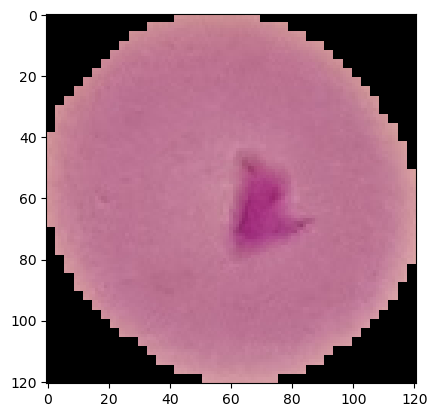

In [24]:
img = cv.imread(r'C:\Users\LISH AI LABS\Documents\Billy_Repo\CEMA\testing-samples\C38P3thinF_original_IMG_20150621_112116_cell_204.png')

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

After resizing the image to the required input shape (256x256), we visualize the resized image. Finally, we make a prediction using the model and print the predicted output.

In [25]:
resize = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)

1/1 [==============================] - 0s 165ms/step
[[0.19607481]]


## Display Predictions

Based on the model's output probability, if the predicted probability of the image belonging to the "Uninfected" class is greater than 0.5, the model predicts "Uninfected." Otherwise, it predicts "Parasitized."


In [31]:
# Display predictions
if yhat[0] > 0.5:
    print("Predicted: Uninfected")
else:
    print("Predicted: Parasitized")

Predicted: Parasitized


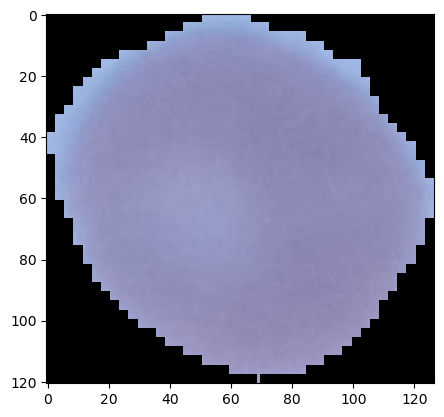

In [32]:
img2 = cv.imread(r'C:\Users\LISH AI LABS\Documents\Billy_Repo\CEMA\testing-samples\C1_thinF_IMG_20150604_104919_cell_82.png')
plt.imshow(img2)
plt.show()

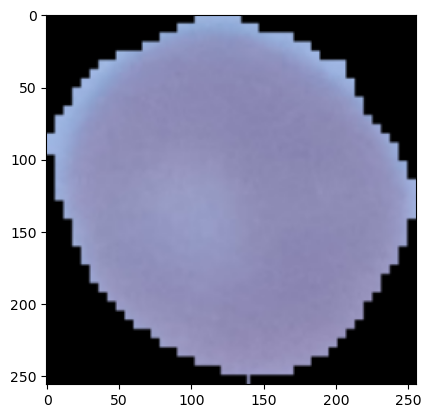

In [33]:
resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [34]:
yhat2 = model.predict(np.expand_dims(resize2/255, 0))

1/1 [==============================] - 0s 47ms/step


In [35]:
print(yhat2)

[[0.92032176]]


In [36]:
# Display predictions
if yhat2[0] > 0.5:
    print("Predicted: Uninfected")
else:
    print("Predicted: Parasitized")

Predicted: Uninfected
